## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

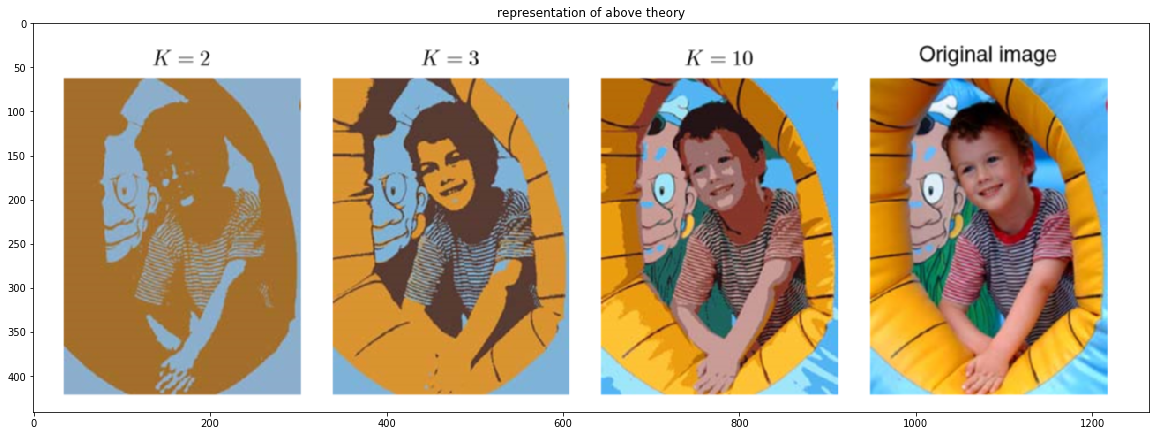

In [2]:
import cv2
from matplotlib import pyplot as plt

ans=cv2.imread('example.png',cv2.COLOR_BGR2RGB)
new_ans=cv2.cvtColor(ans,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(new_ans)
plt.title('representation of above theory')
plt.show()

## We can say image segmentation is partition of an image into regions having similar colors matching

## Grouping regions which are visually similar

## We will be doing that with the different values of k ,i.e k=2 means only using 2 colors and so on
## These kind of techinques can be used for image compression as well at the cost of some imformation loss

## Firstly we will find k colors which are most dominat in the image 
## 

In [4]:
import matplotlib.pyplot as plt
import cv2

In [5]:
# Reads an image into BGR Format
im =  cv2.imread('elephant.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)


(330, 500, 3)


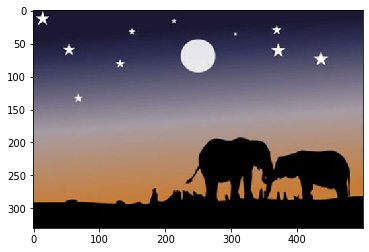

In [7]:
# as RGB Format
plt.imshow(im)
plt.show()


# cv2 reads the image in BGR format but matplot displays it in the RGB format

### Now we will flatten the image in the linear array

In [95]:
# Flatten Each channel of the Image i.
# i.e we are making linear array for each channel i.e one linear array of red one for blue and one for green
# instead of -1 we can also write 330*500


all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## What we are actually doing is that there is a 3-d rgb space in which we will extract the most dominat k colors by using Kmeans algorithm and the center for each of the color

In [98]:
from sklearn.cluster import KMeansans

dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)

# we give pixels data to fit function
# fit function will map the k colors in rgb space i.e try to find clusters or blob
# i.e we trying to find center for each of the k color
km.fit(all_pixels)


# centers will contain the rgb values of the k most dominat colors
centers = km.cluster_centers_

In [99]:
# converting the color values from float to integer 
# as it will not affect the answer much and may protect from abrsain
# we are speciying the conversion to unsigned integer and 8 bit interger i.e (0-255) are the colors and 
# can be stored in 8 bit integers i.e to represent rgb color 8 bit interger is enough


centers = np.array(centers,dtype='uint8')

In [100]:
print(centers)

[[  1   0   1]
 [174 145 128]
 [ 98  94 117]
 [ 38  35  64]]


## these are the rgb values for the k colors i.e rgb values for the 4 colors
## 101 is very close to black (0,0,0)

### Plot what all colors are these ?

## We will make a (1,k) subplot i.e 4 subplot with each subplot having the dominat color

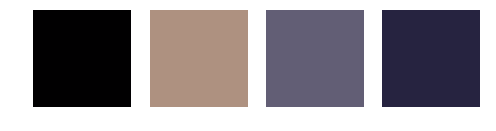

In [101]:
# we will be making 4 boxes with each having the dominat color

i = 1
plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    # creating a of unsigned integer of 8 bit
    # i.e we will be making a matrix of 100*100*3 
    # then filling the matrix and display that matrix
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


## We have ploted the 4 most dominat colors in each matrix

## Now we will plot the image using these four dominat colors only

## Segmenting Our Original Image

In [102]:
# creating a new image having the size of previous image
# and containg all the zeros i.e we have flatten up the previous image


new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)


(165000, 3)


In [103]:
colors

[array([1, 0, 1], dtype=uint8),
 array([174, 145, 128], dtype=uint8),
 array([ 98,  94, 117], dtype=uint8),
 array([38, 35, 64], dtype=uint8)]

In [104]:
# For each pixel we will be having some id mapped to it
km.labels_

array([3, 3, 3, ..., 0, 0, 0])

## We will iterate over each pixel of the image and see to which color out of our 4 color our pixel matches i.e out of all color we will match the closeness toward 4 color

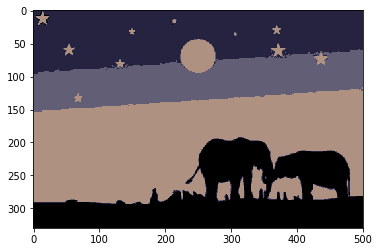

In [105]:
# each pixel will be assigned a new color out of 4 color


for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
    
    
